In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("smoking_driking_dataset_Ver01 (1).csv")

In [3]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt


In [5]:
print("CATEGORICAL VARIABLES:")
cat_vars=df.select_dtypes(include=["object"]).columns
for col in cat_vars:
    print(col)

CATEGORICAL VARIABLES:
sex
DRK_YN


In [6]:
print("NUMERICAL VARIABLES:")
num_vars = df._get_numeric_data().columns
for col in num_vars:
    print(col)

NUMERICAL VARIABLES:
age
height
weight
waistline
sight_left
sight_right
hear_left
hear_right
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
urine_protein
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP
SMK_stat_type_cd


In [7]:
df.shape

(991346, 24)

In [8]:
def get_nulls(df):
    dict_nulls={}
    for col in df.columns:
        dict_nulls[col]=df[col].isnull().sum()
    df_nulls=pd.DataFrame(data=list(dict_nulls.values()),index=list(dict_nulls.keys()),columns=["No. of nulls"])
    return df_nulls

get_nulls(df)
    

,No. of nulls
sex,0
age,0
height,0
weight,0
waistline,0
sight_left,0
sight_right,0
hear_left,0
hear_right,0
SBP,0


In [9]:
#no missing values this is good as there is then relatively no feature engineering required

In [10]:
def get_nulls_percentage(df):    
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values
    
    df_nulls = pd.DataFrame(data=list(dict_nulls.values()), 
                            index=list(dict_nulls.keys()), 
                            columns=['% nulls'])
    return df_nulls
    
get_nulls_percentage(df)

,% nulls
sex,0.0%
age,0.0%
height,0.0%
weight,0.0%
waistline,0.0%
sight_left,0.0%
sight_right,0.0%
hear_left,0.0%
hear_right,0.0%
SBP,0.0%


In [11]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [12]:
len(df.columns)

24

In [13]:
num_vars

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd'],
      dtype='object')

In [14]:
cat_vars

Index(['sex', 'DRK_YN'], dtype='object')

In [15]:
from pandas_profiling import ProfileReport

C:\Users\aabir\AppData\Local\Temp\ipykernel_10540\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [16]:
profile1=ProfileReport(df)

In [16]:
profile1

NameError: name 'profile1' is not defined

In [17]:
import seaborn as sns

<AxesSubplot:>

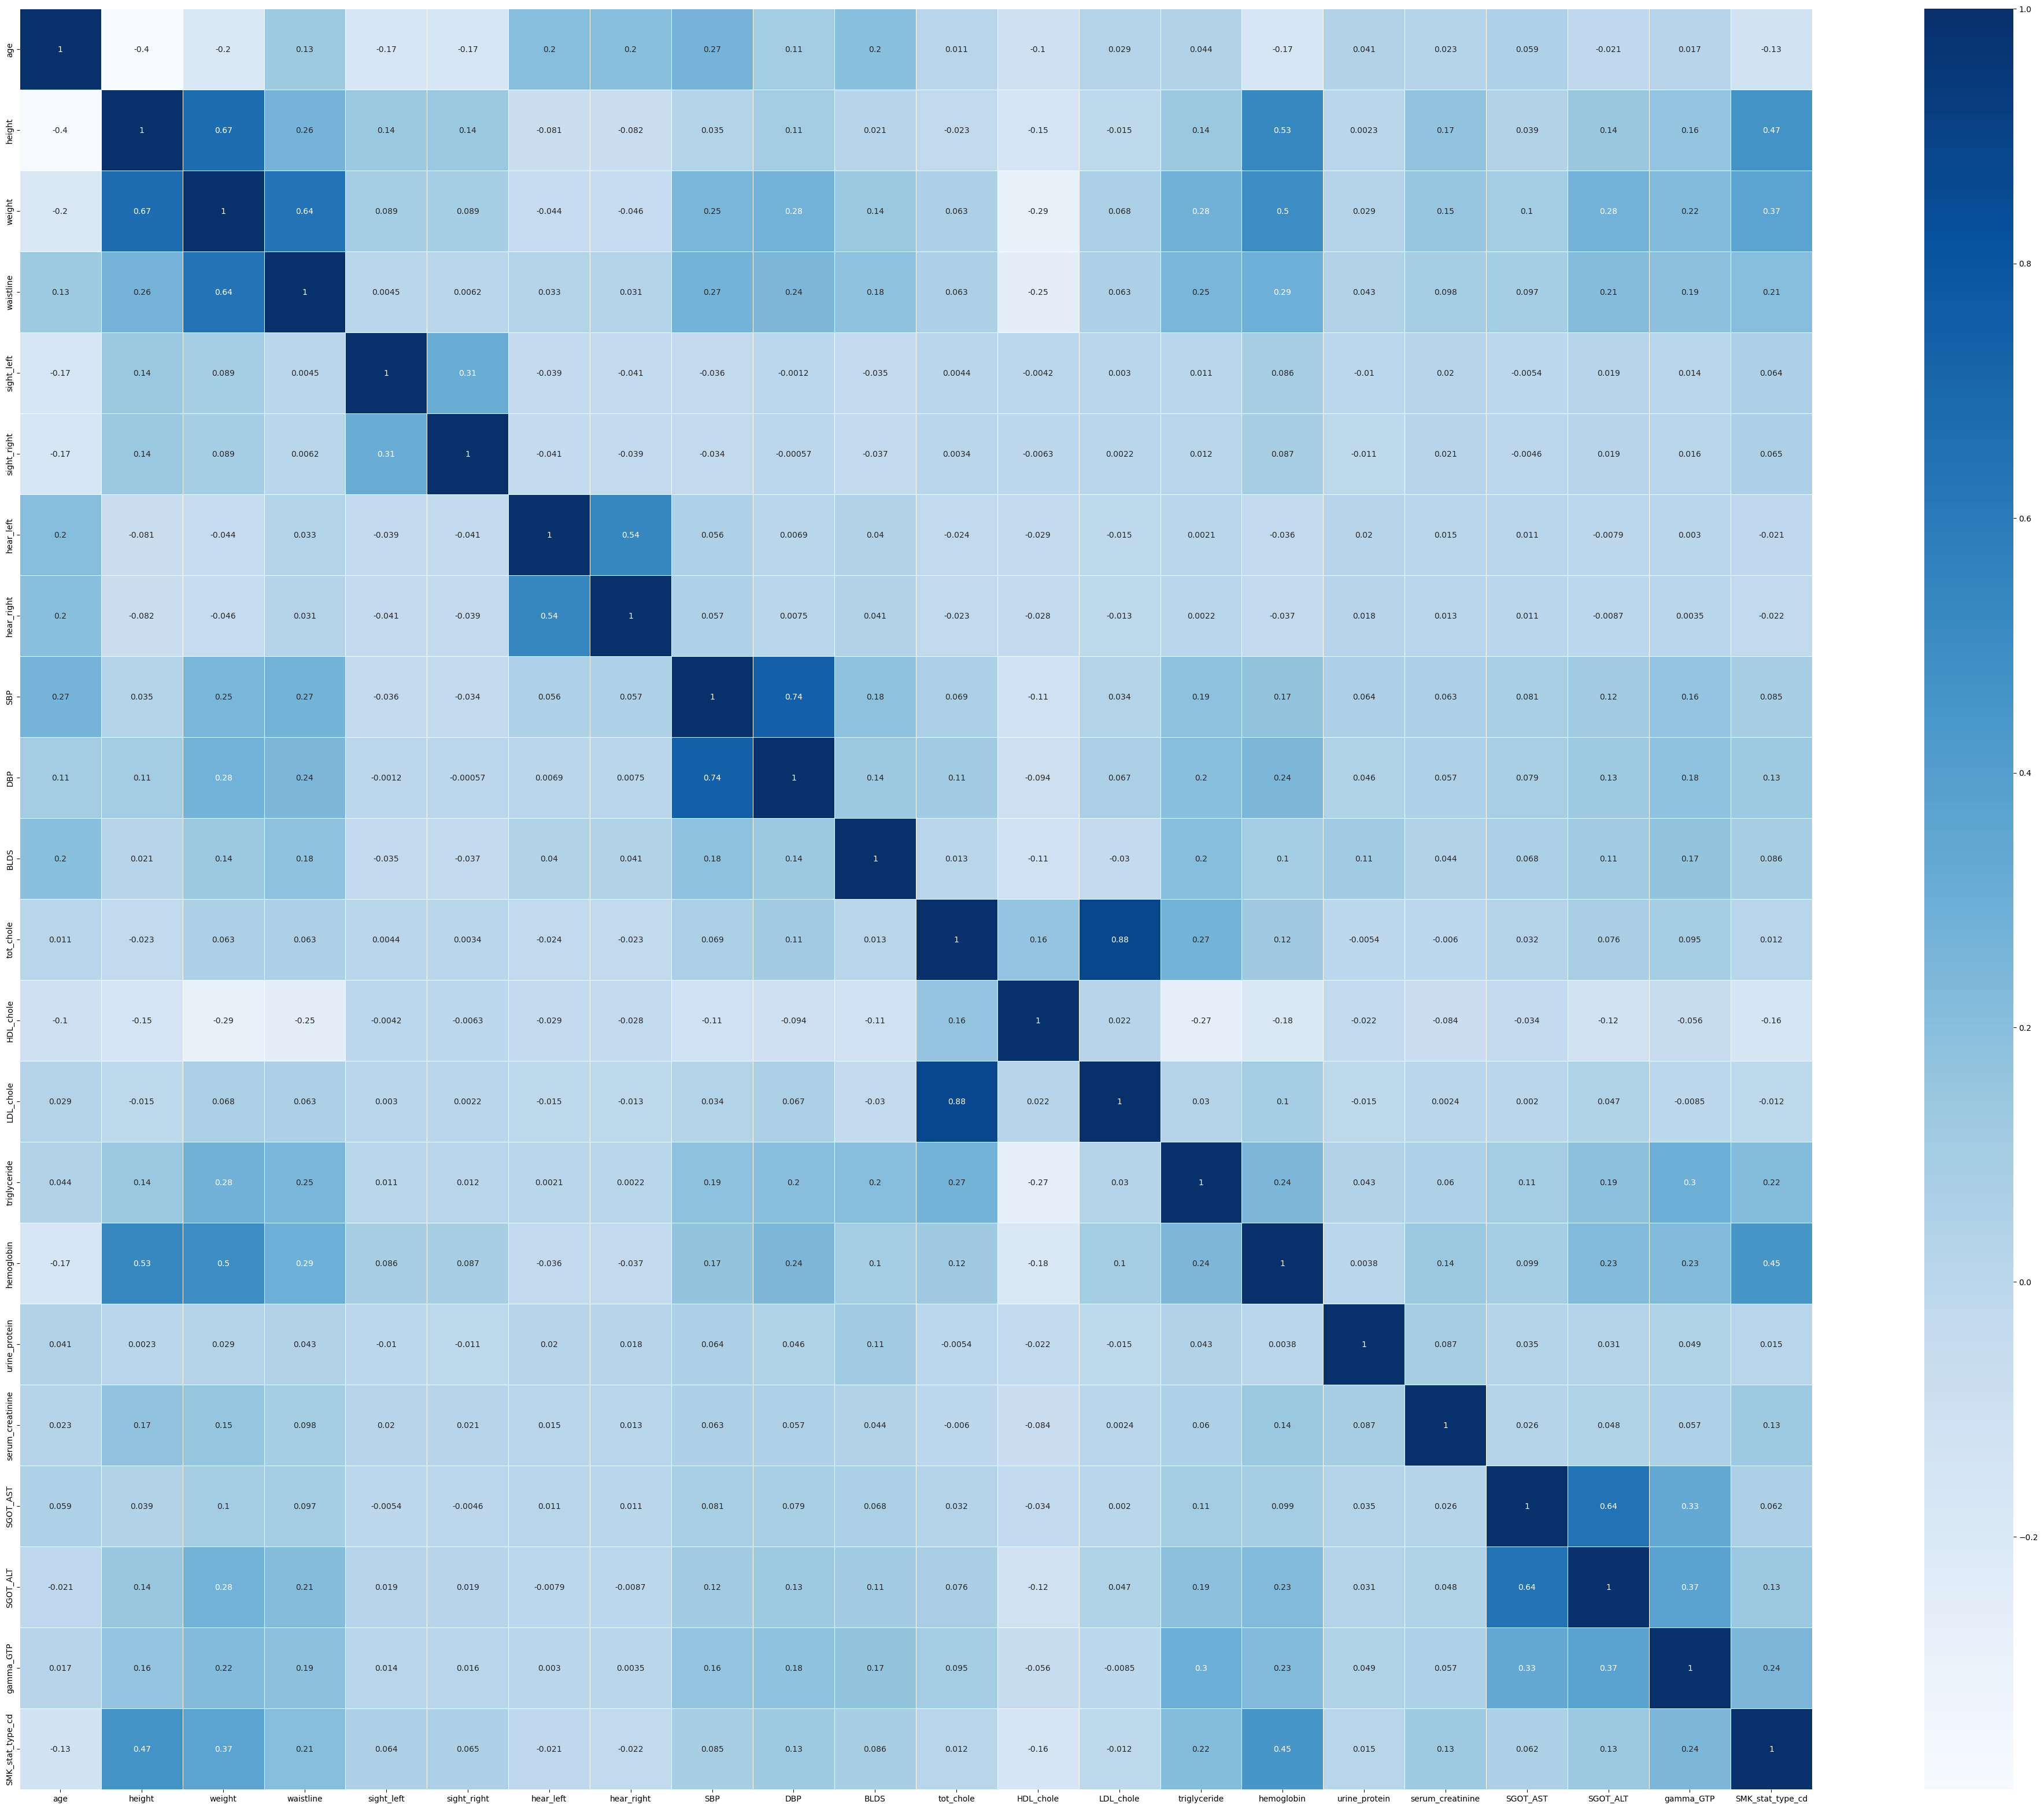

In [18]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),annot=True,linewidth=0.4,cmap='Blues')

Text(0.5, 1.0, 'Target column evaluation')

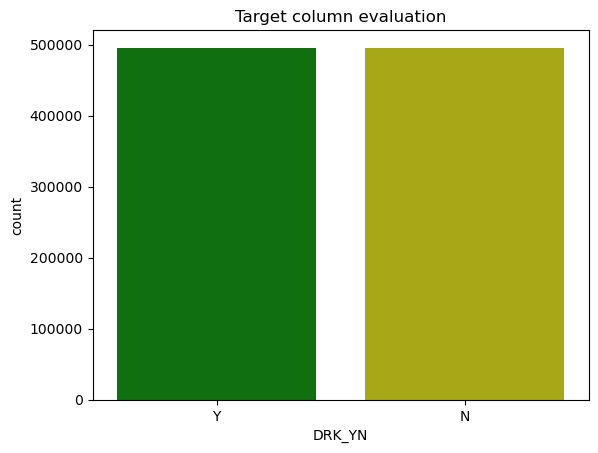

In [19]:
sns.countplot(x='DRK_YN',data=df,palette=['g','y'])
plt.title('Target column evaluation')

In [20]:
cr=df.corr()
cr

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
age,1.000000,-0.398501,-0.195337,0.127170,-0.172096,-0.167684,0.203021,0.198693,0.265530,0.108847,...,-0.104624,0.029497,0.043549,-0.173081,0.041497,0.022819,0.059408,-0.020506,0.017391,-0.126031
height,-0.398501,1.000000,0.668823,0.263945,0.139141,0.138529,-0.081159,-0.082456,0.035030,0.108780,...,-0.148599,-0.015450,0.137611,0.531898,0.002298,0.171256,0.039203,0.144842,0.162340,0.467317
weight,-0.195337,0.668823,1.000000,0.637173,0.088901,0.088707,-0.044498,-0.045709,0.250770,0.277891,...,-0.287688,0.067859,0.283774,0.499491,0.029281,0.153885,0.099652,0.276440,0.221881,0.366499
waistline,0.127170,0.263945,0.637173,1.000000,0.004511,0.006158,0.033224,0.031012,0.272323,0.240890,...,-0.253988,0.063416,0.249436,0.291730,0.043132,0.098421,0.096858,0.212267,0.186988,0.205485
sight_left,-0.172096,0.139141,0.088901,0.004511,1.000000,0.307985,-0.039428,-0.040998,-0.035617,-0.001209,...,-0.004224,0.003013,0.010599,0.085896,-0.010253,0.020309,-0.005427,0.018815,0.013566,0.064194
sight_right,-0.167684,0.138529,0.088707,0.006158,0.307985,1.000000,-0.040764,-0.038895,-0.033994,-0.000568,...,-0.006259,0.002155,0.012265,0.086847,-0.010897,0.021447,-0.004600,0.018920,0.016491,0.065051
hear_left,0.203021,-0.081159,-0.044498,0.033224,-0.039428,-0.040764,1.000000,0.536890,0.056065,0.006893,...,-0.029464,-0.014621,0.002095,-0.036058,0.019754,0.015254,0.011283,-0.007907,0.002991,-0.021245
hear_right,0.198693,-0.082456,-0.045709,0.031012,-0.040998,-0.038895,0.536890,1.000000,0.057436,0.007524,...,-0.028046,-0.013438,0.002155,-0.036703,0.018264,0.012959,0.010763,-0.008687,0.003548,-0.022330
SBP,0.265530,0.035030,0.250770,0.272323,-0.035617,-0.033994,0.056065,0.057436,1.000000,0.741131,...,-0.111772,0.033619,0.186003,0.166530,0.063518,0.062605,0.081478,0.117613,0.161434,0.084918
DBP,0.108847,0.108780,0.277891,0.240890,-0.001209,-0.000568,0.006893,0.007524,0.741131,1.000000,...,-0.093838,0.066984,0.198651,0.241980,0.046054,0.057053,0.078555,0.131320,0.175610,0.126849


<AxesSubplot:>

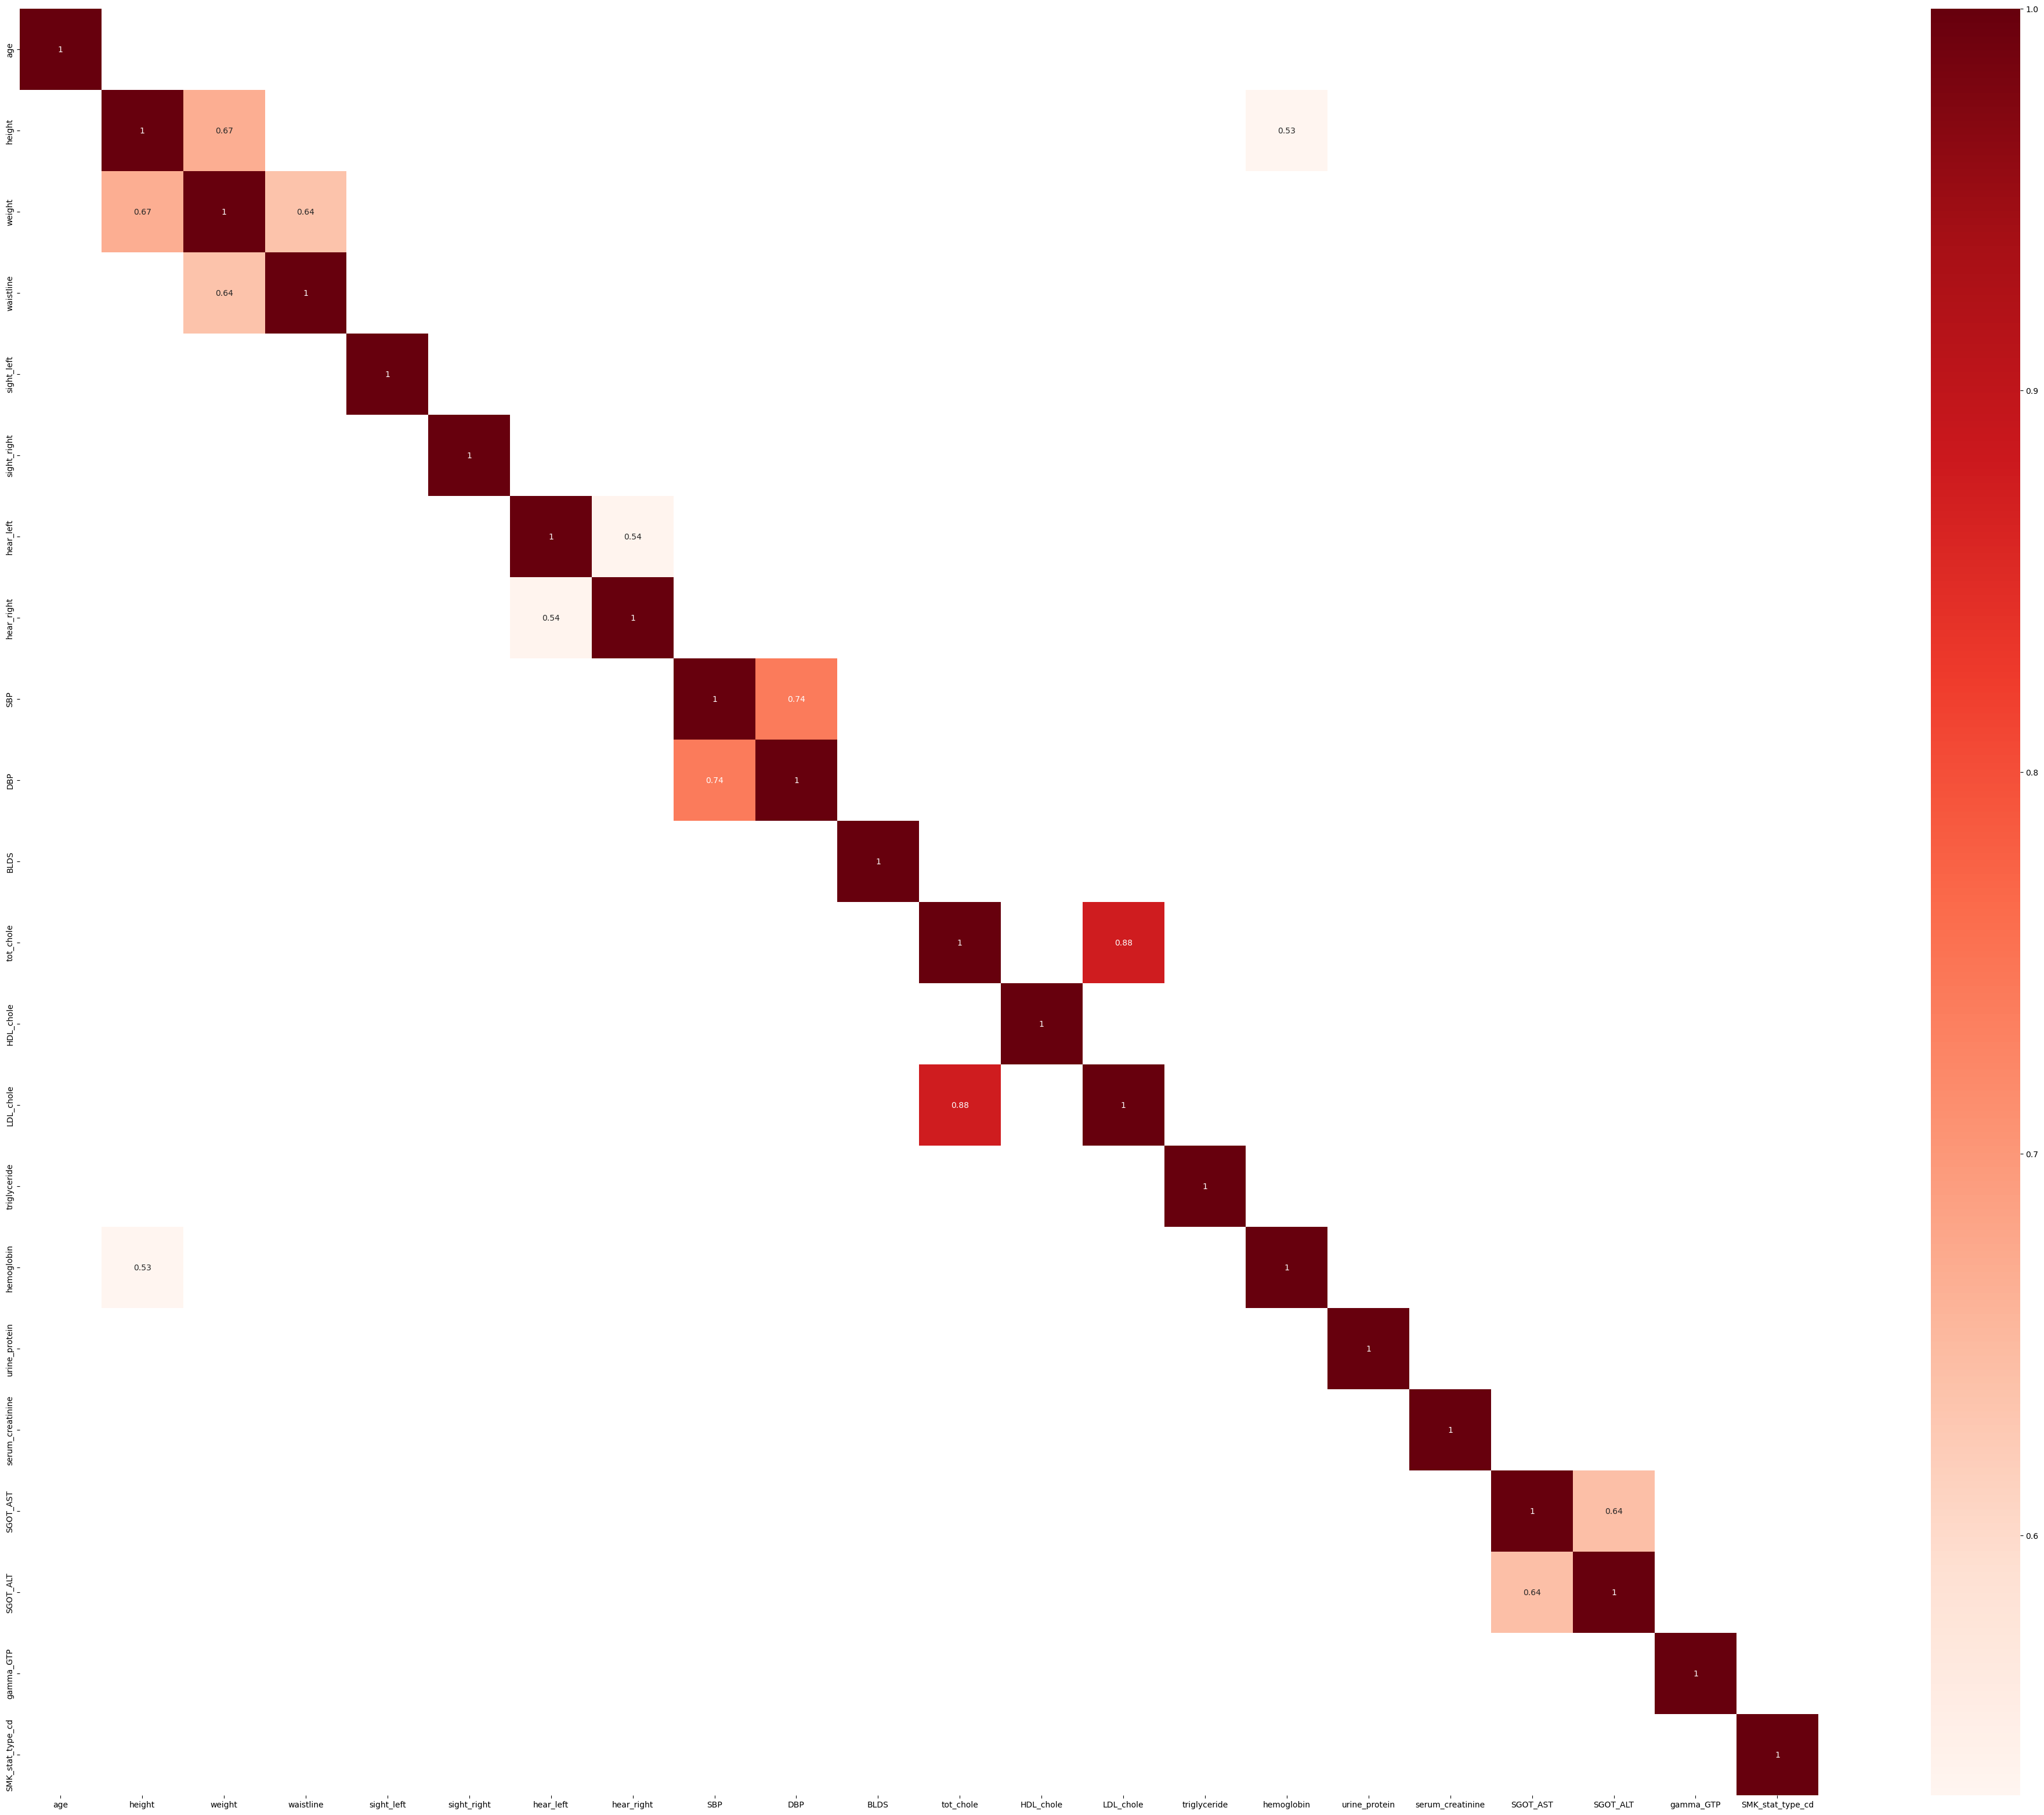

In [21]:
#filtering the fatures with correlation greater than 0.5
hcr=cr[cr>=0.5]
plt.figure(figsize=(50,40))
sns.heatmap(hcr,annot=True,cmap='Reds')

<AxesSubplot:>

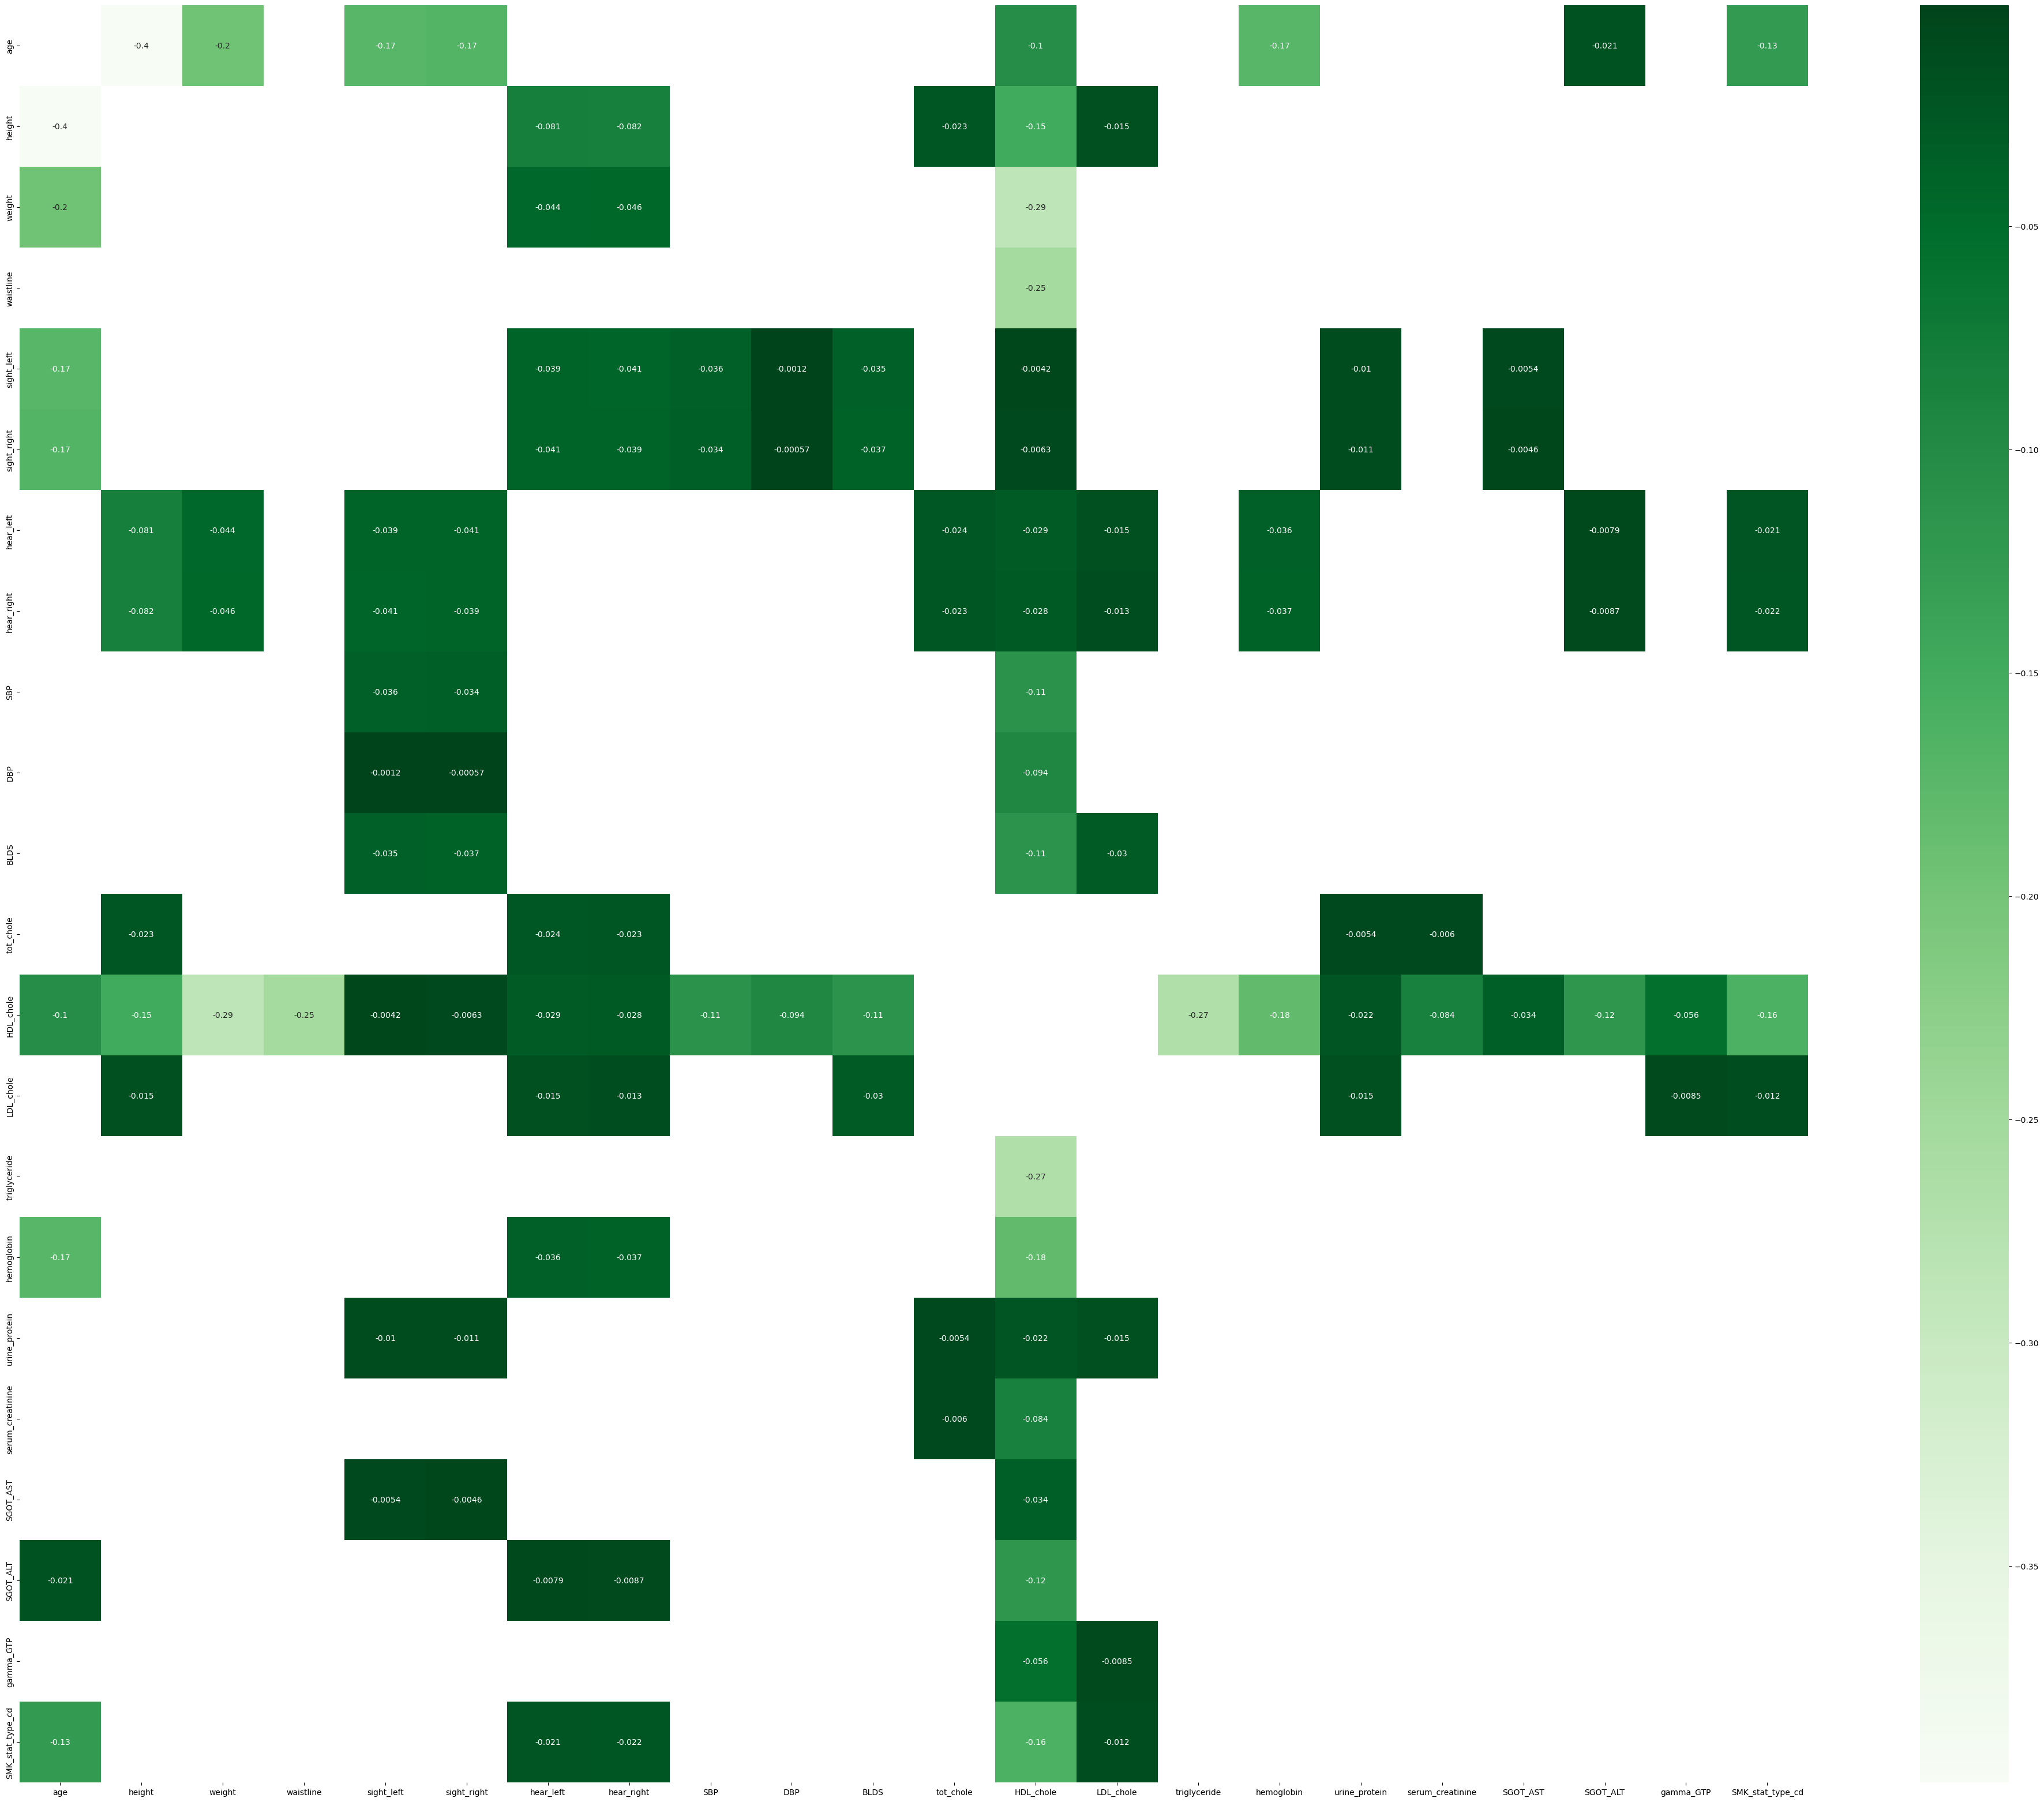

In [22]:
plt.figure(figsize=(50,40))
lcr=cr[cr<=0.0]
sns.heatmap(lcr,annot=True,cmap='Greens')

In [23]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [24]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1,1,114,...,125,132,15.0,1,1.0,26,36,27,1,N
991342,Male,35,170,75,86.0,1.0,1.5,1,1,119,...,84,45,15.8,1,1.1,14,17,15,1,N
991343,Female,40,155,50,68.0,1.0,0.7,1,1,110,...,77,157,14.3,1,0.8,30,27,17,3,Y
991344,Male,25,175,60,72.0,1.5,1.0,1,1,119,...,73,53,14.5,1,0.8,21,14,17,1,N


In [25]:
cat_vars

Index(['sex', 'DRK_YN'], dtype='object')

In [26]:
sex_unique=df["sex"].unique()
sex_unique

array(['Male', 'Female'], dtype=object)

In [27]:
df["sex"]=df["sex"].map(dict(zip(sex_unique,list(range(len(sex_unique)))))).astype(int)

In [28]:
df["sex"]

0         0
1         0
2         0
3         0
4         0
         ..
991341    0
991342    0
991343    1
991344    0
991345    0
Name: sex, Length: 991346, dtype: int32

In [29]:
drk_yn_unique=df["DRK_YN"].unique()
drk_yn_unique

array(['Y', 'N'], dtype=object)

In [30]:
df["DRK_YN"]=df["DRK_YN"].map(dict(zip(drk_yn_unique,list(range(len(drk_yn_unique)))))).astype(int)

In [31]:
df["DRK_YN"]

0         0
1         1
2         1
3         1
4         1
         ..
991341    1
991342    1
991343    0
991344    1
991345    0
Name: DRK_YN, Length: 991346, dtype: int32

In [32]:
drk_yn_unique

array(['Y', 'N'], dtype=object)

In [33]:
#here 0 is yes and no is 1

In [34]:
len(num_vars)

22

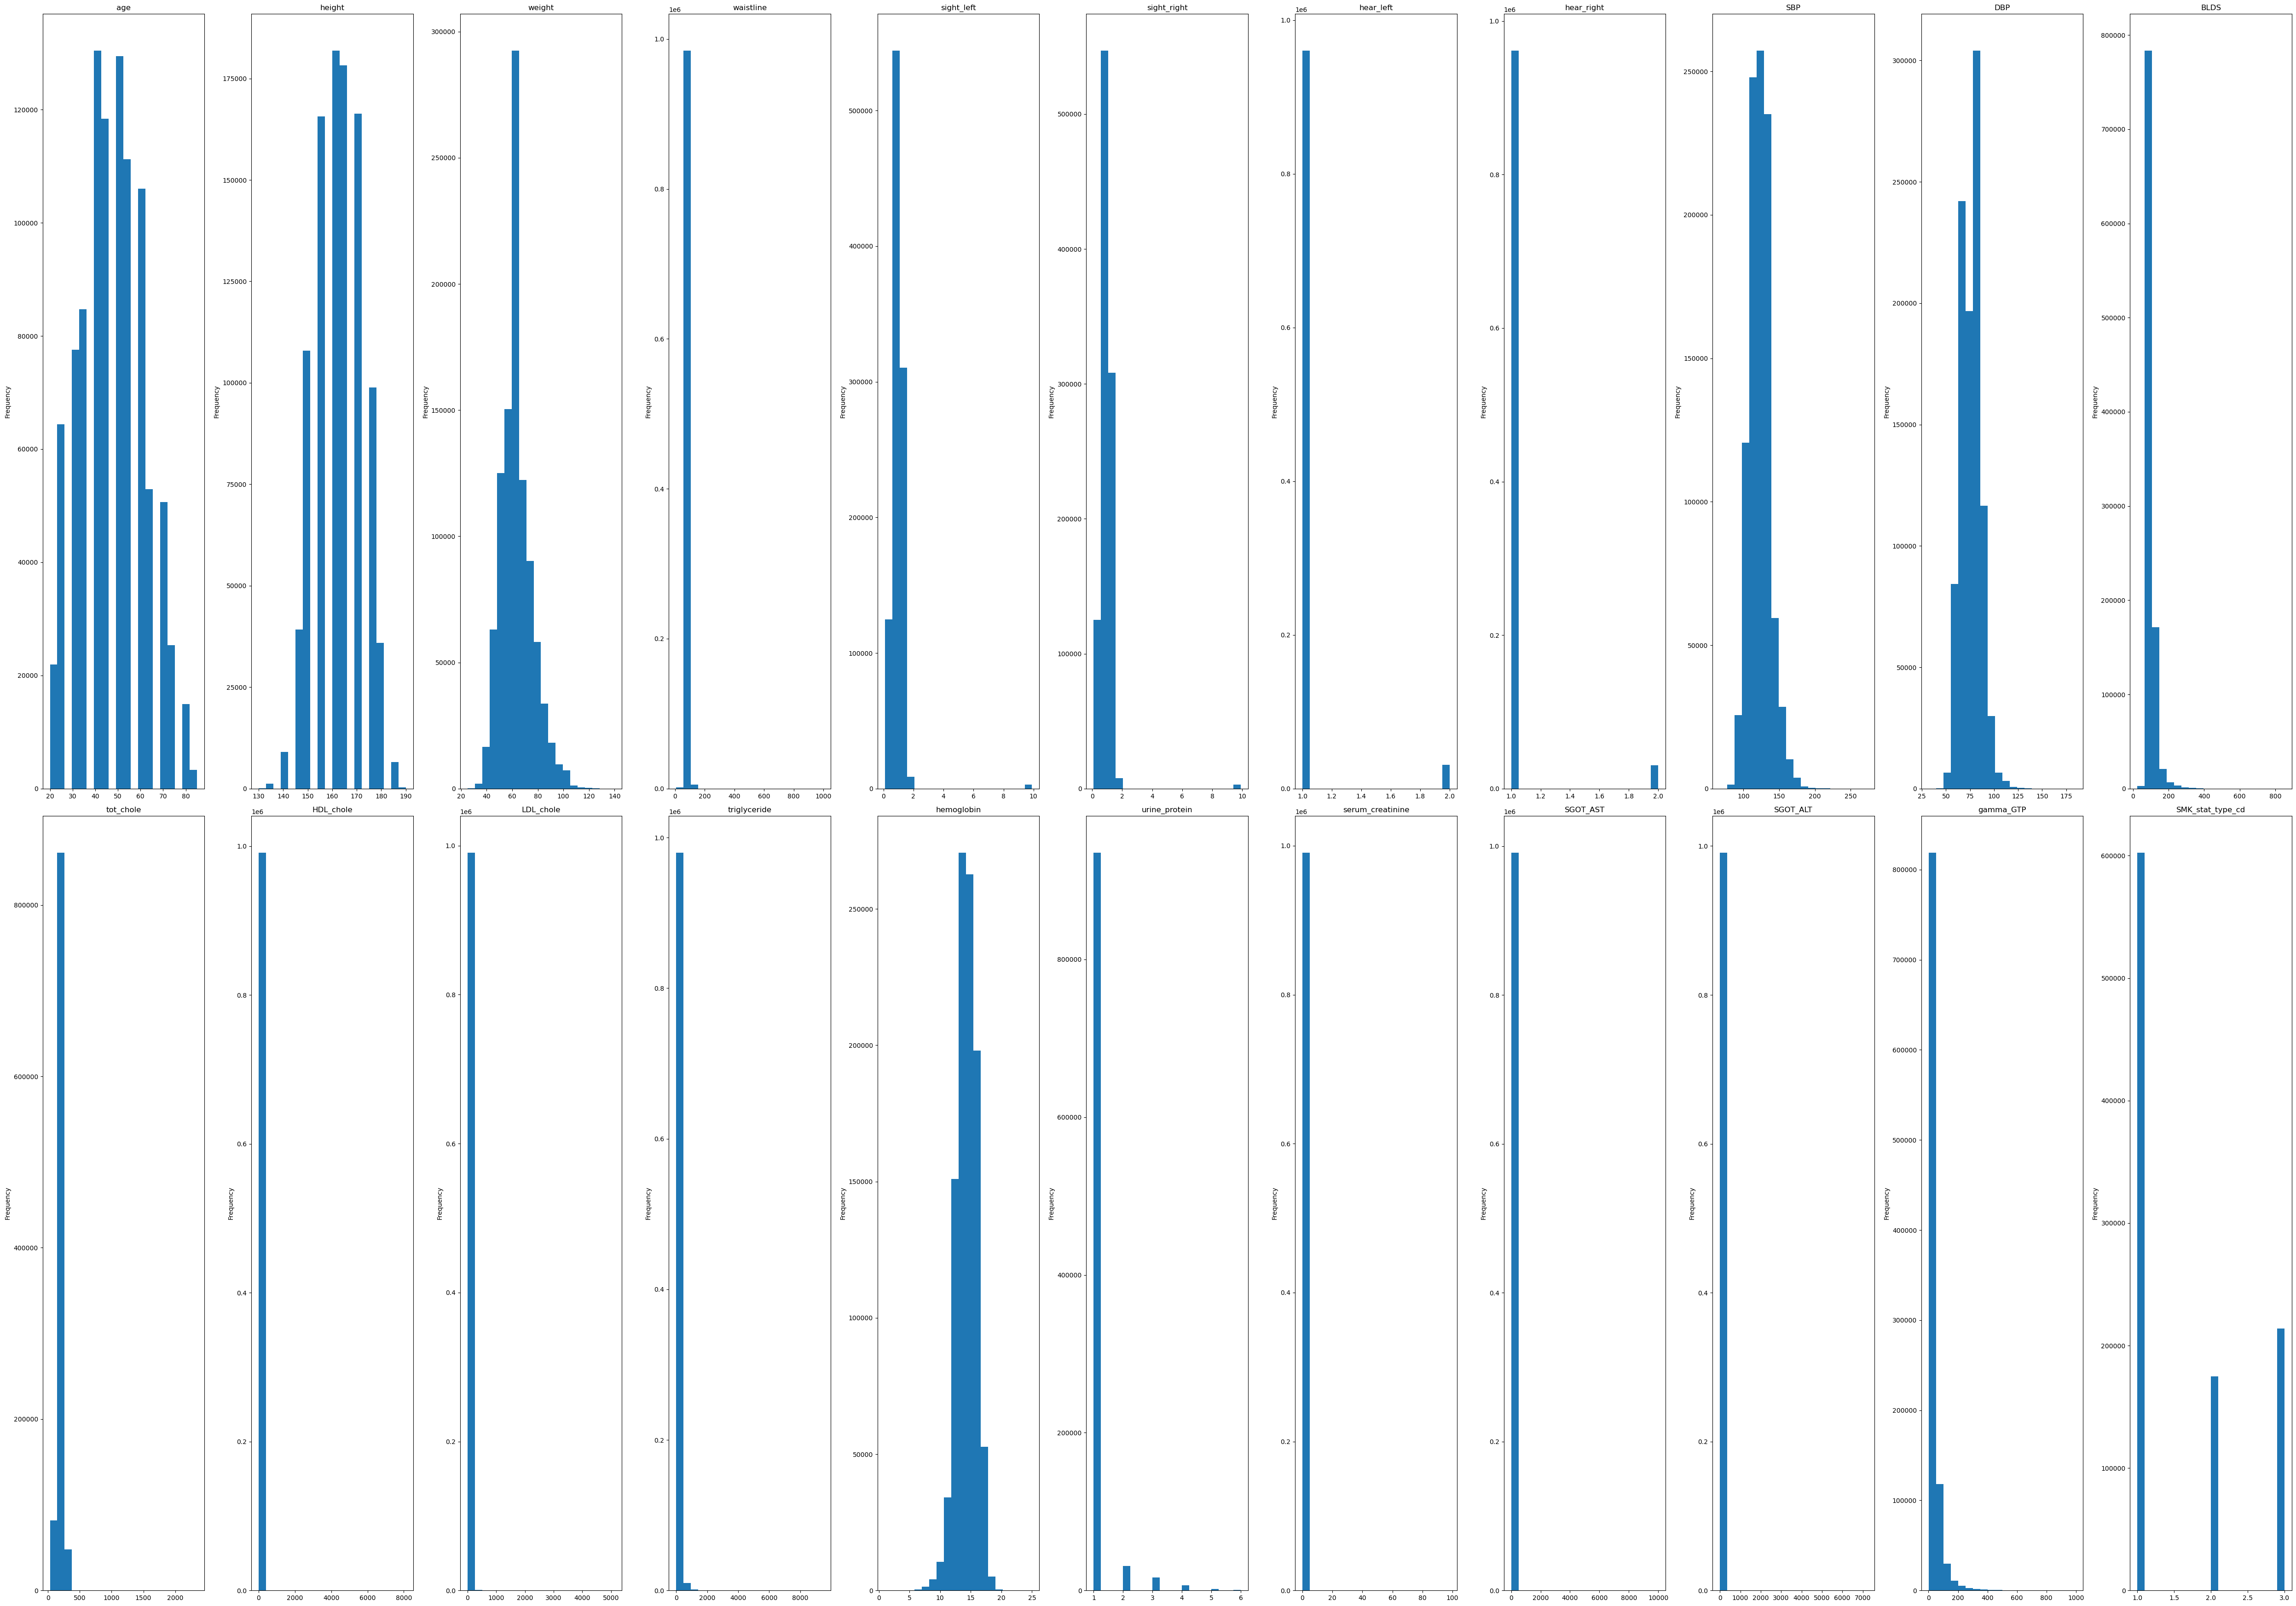

In [35]:
plt.figure(figsize=(50,35))
for i,num_col in enumerate(num_vars):
    plt.subplot(2,11,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

In [36]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [37]:
x=df.drop("DRK_YN",axis=1).values
y=df["DRK_YN"].values

In [38]:
x,y

(array([[  0.,  35., 170., ...,  35.,  40.,   1.],
        [  0.,  30., 180., ...,  36.,  27.,   3.],
        [  0.,  40., 165., ...,  32.,  68.,   1.],
        ...,
        [  1.,  40., 155., ...,  27.,  17.,   3.],
        [  0.,  25., 175., ...,  14.,  17.,   1.],
        [  0.,  50., 160., ...,  43.,  36.,   3.]]),
 array([0, 1, 1, ..., 0, 1, 0]))

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((793076, 23), (793076,), (198270, 23), (198270,))

In [41]:
df.shape

(991346, 24)

In [42]:
from sklearn.svm import SVC

In [43]:
lf=LogisticRegression()


In [44]:
lf.fit(x_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
predictions=lf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7158218590810511

In [46]:
rf=RandomForestClassifier()

In [47]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
predictions1=rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions1)

0.7338124779341302

In [49]:
#svc,naive,knn

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

GaussianNB()

In [52]:
predictions3=model.predict(x_test)
accuracy_score(y_test,predictions3)

0.6914460079689313

In [53]:
#svc,knn

In [54]:
#SVC models took over more than 5 hours to train and still did not completely fit into training data
#Random forest classifiers too more time than logistic regression which shows their memory utilisation is a bit heavier

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn = KNeighborsRegressor(n_neighbors=891)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=891)

In [61]:
predictions4=knn.predict(x_test)


KeyboardInterrupt: 

In [66]:
dr=pd.DataFrame(dict(model=["Logistic regression","Random Forest","Naive Bayes"],accuracy=[accuracy_score(y_test,predictions),accuracy_score(y_test,predictions1),accuracy_score(y_test,predictions3)]))

<AxesSubplot:title={'center':'model accuracy'}, xlabel='model'>

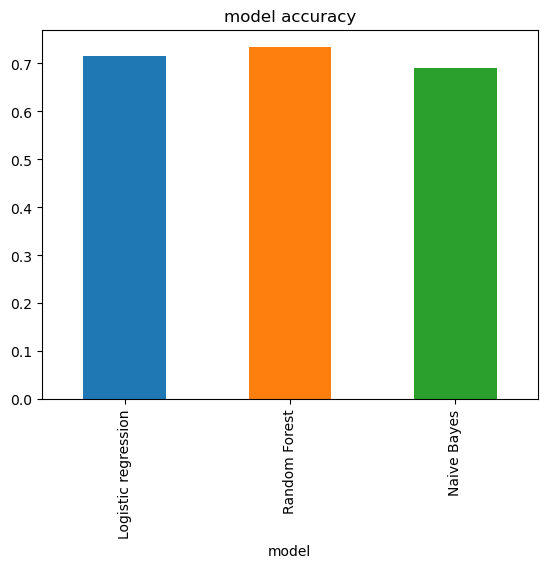

In [68]:
dr.plot(kind="bar",x="model",y="accuracy",title="model accuracy",legend=False,color=['#1F77B4', '#FF7F0E', '#2CA02C'])

In [69]:
# we see that random forest has the highest accuracy here

In [71]:
# this concludes the project below is a tesnorflow representaion of the model for extra
from keras.layers import Dense

In [74]:
model1=Sequential()
model1.add(Dense(32,activation="relu",input_dim=x_train.shape[1]))
model1.add(Dense(16,activation="relu"))
model1.add(Dense(8,activation="relu"))
model1.add(Dense(4,activation="relu"))
model1.add(Dense(2,activation="softmax"))


In [75]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [76]:
model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001),metrics=["accuracy"])

In [77]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                768       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 1,478
Trainable params: 1,478
Non-trainable params: 0
_________________________________________________________________


In [79]:
early=EarlyStopping(patience=3,restore_best_weights=True)
model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000,callbacks=[early])

Epoch 1/1000
24784/24784 [==============================] - 49s 2ms/step - loss: 0.2500 - accuracy: 0.5001 - val_loss: 0.2500 - val_accuracy: 0.4977
Epoch 2/1000
24784/24784 [==============================] - 90s 4ms/step - loss: 0.2500 - accuracy: 0.5003 - val_loss: 0.2500 - val_accuracy: 0.4977
Epoch 3/1000
24784/24784 [==============================] - 54s 2ms/step - loss: 0.2500 - accuracy: 0.5003 - val_loss: 0.2500 - val_accuracy: 0.4977
Epoch 4/1000
24784/24784 [==============================] - 58s 2ms/step - loss: 0.2500 - accuracy: 0.5003 - val_loss: 0.2500 - val_accuracy: 0.4977
